### Resume Screening is a multi labelled classification problem

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

# Exploring Categories

In [5]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

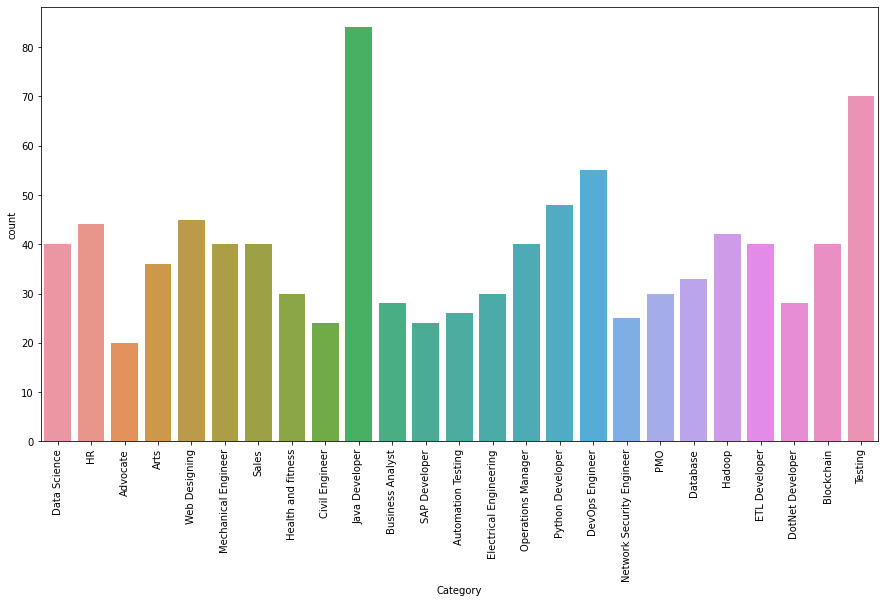

In [6]:
plt.figure(figsize=(15,8))
sns.countplot(x = df["Category"])
plt.xticks(rotation=90)
plt.show()

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

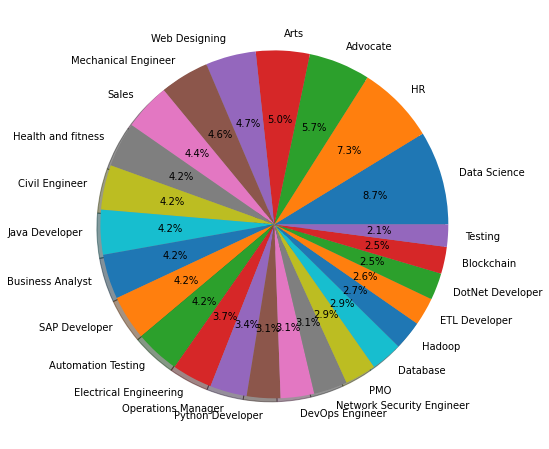

In [8]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(12,8))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True)
plt.show()

# Exploring Resume

In [9]:
df['Category'][0]

'Data Science'

In [10]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data

1. URLs
2. Hashtags
3. Mentions
4. Special Letters
5. Puntuations

In [11]:
import re
def CleanResume(txt):
    cleantxt = re.sub('http\S+\s', ' ', txt)
    cleantxt = re.sub('RT|cc', ' ', cleantxt)
    cleantxt = re.sub('#\S+\s', ' ', cleantxt)
    cleantxt = re.sub('@\S+', ' ', cleantxt)
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]', ' ', cleantxt)
    cleantxt = re.sub('\s+', ' ', cleantxt)
    return cleantxt

In [12]:
df['UpdatedResume'] = df['Resume'].apply(lambda x: CleanResume(x))

In [13]:
df['UpdatedResume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the revie

In [14]:
df.head()

,Category,Resume,UpdatedResume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


# Convert Categorical Values into Numerical

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
df.head()

,Category,Resume,UpdatedResume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [18]:
df1 = df.drop(columns = 'Resume')

In [19]:
df1.head()

,Category,UpdatedResume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 BE UITR...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [20]:
df1.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

0. Advocate
1. Arts
2. Automation Testing
3. Blockchain
4. Business Analyst
5. Civil Engineer
6. Data Science
7. Database
8. DevOps Engineer
9. DotNet Developer
11. Electrical Engineering
10. ETL Developer
13. Hadoop
14. Health and Fitness
12. HR
15. Java Developer
16. Mechanical Engineer
17. Nework Security Engineer
18. Operation Manager
19. PMO
20. Python Developer
22. Sales
21. SAP Developer
23. Testing
24. Web Designing

# Vectorization

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(df['UpdatedResume'])
RequiredTxt = tfidf.transform(df['UpdatedResume'])

In [22]:
RequiredTxt

<962x7891 sparse matrix of type '<class 'numpy.float64'>'
	with 164494 stored elements in Compressed Sparse Row format>

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(RequiredTxt, df['Category'], test_size = 0.2, random_state = 42)

In [25]:
X_train.shape, X_test. shape

((769, 7891), (193, 7891))

In [26]:
y_train.shape, y_test.shape

((769,), (193,))

# Model Training and Classification Report

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

KNClf = OneVsRestClassifier(KNeighborsClassifier())
KNClf.fit(X_train, y_train)
y_pred = KNClf.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [28]:
print(accuracy_score(y_test, y_pred))

0.9844559585492227


# Model Prediction

In [29]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(KNClf, open('KNClf.pkl', 'wb'))

In [30]:
myresume = """Skills:
Programming Languages: Python (NumPy, Pandas, Scikit-Learn), R
Data Analysis: Statistical Analysis, Regression Analysis, Hypothesis Testing
Machine Learning: Supervised and Unsupervised Learning, Decision Trees, Random Forests, Neural Networks
Data Visualization: Matplotlib, Seaborn, Tableau
Database Management: SQL
Big Data Technologies: Hadoop, Spark
Tools: Jupyter Notebooks, Git, Docker
Soft Skills: Problem Solving, Communication, Team Collaboration
Experience:
Data Scientist | [Company Name], [City, State]

[Month Year] - Present

Conduct exploratory data analysis on large datasets to identify trends and patterns.
Develop and implement machine learning models for predictive analytics.
Collaborate with cross-functional teams to understand business requirements and provide data-driven insights.
Create and maintain data pipelines for efficient data extraction, transformation, and loading (ETL) processes.
Present findings and recommendations to both technical and non-technical stakeholders.
Data Analyst | [Company Name], [City, State]

[Month Year] - [Month Year]

Cleaned and processed raw data to ensure accuracy and reliability.
Conducted statistical analysis and created visualizations to communicate key insights.
Assisted in the development of data-driven strategies for business improvement.
Collaborated with IT teams to optimize database queries and improve data accessibility.
Projects:
Predictive Maintenance Model

Developed a machine learning model to predict equipment failures, reducing downtime by 20%.

Customer Segmentation Analysis

Performed clustering analysis on customer data, leading to targeted marketing strategies and a 15% increase in customer engagement.

"""

In [31]:
import pickle

# Load the trained classifier
KNClf = pickle.load(open('KNClf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = CleanResume(myresume)

# Transform the cleaned resume using the trained Tfidfvectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = KNClf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    0: "Advocate",
    1: "Arts",
    2: "Automation Testing",
    3: "Blockchain",
    4: "Business Analyst",
    5: "Civil Engineer",
    6: "Data Science",
    7: "Database",
    8: "DevOps Engineer",
    9: "DotNet Developer",
    10: "ETL Developer",
    11: "Electrical Engineering",
    12: "HR",
    13: "Hadoop",
    14: "Health and Fitness",
    15: "Java Developer",
    16: "Mechanical Engineer",
    17: "Nework Security Engineer",
    18: "Operation Manager",
    19: "PMO",
    20: "Python Developer",
    21: "SAP Developer",
    22: "Sales",
    23: "Testing",
    24: "Web Designing"
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category: ", category_name)

Predicted Category:  Data Science
